In [1]:
# prototype functions
def A_rect(B,y):
    A_rect = B*y
    return(A_rect)

def P_rect(B,y):
    P_rect = B + y + y
    return(P_rect)

def Rh(A,P):
    Rh = A/P
    return(Rh)

def slope_f(discharge,mannings_n,area,radius):
    slope_f = (discharge**2)*(mannings_n**2)/( (radius**(4/3))*(area**2) )
    return(slope_f)

In [2]:
# input information
begin_depth = 8
end_depth   = 5
discharge   = 55.4
how_many    = 32
manningn    = 0.020
slope       = 0.001
width       = 5

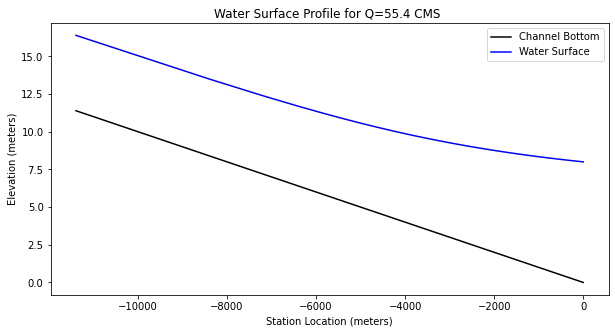

Depth at station -11393.235683125995  is 5.0


In [3]:
# empty lists for variables
depth    = [0 for i in range(how_many)] #flow depth
bse      = [0 for i in range(how_many)] #channel bottom elevation
wse      = [0 for i in range(how_many)] #water surface elevation
deltax   = [0 for i in range(how_many)] #space steps
distance = [0 for i in range(how_many)] #station locations
velocity = [0 for i in range(how_many)] #section velocity

delta_depth = (begin_depth-end_depth)/(how_many-1)# change in depth for finding spatial steps

depth[0] = (begin_depth) # assign downstream value

for i in range(how_many):
    depth[i] = (depth[0]-i*delta_depth)# depth values to evaluate
    velocity[i] = (discharge/A_rect(width,depth[i])) #velocity for each depth
    
for i in range(how_many-1):
    depth_bar     = 0.5*(depth[i]+depth[i+1])    #compute average depth in reach
    area_bar      = A_rect(width,depth_bar)      #compute average area in reach
    perimeter_bar = P_rect(width,depth_bar)  #compute average wetted perimeter
    radius_bar    = Rh(area_bar,perimeter_bar)   #compute average hydraulic radius
    friction = slope_f(discharge,manningn,area_bar,radius_bar) #compute friction slope
    deltax[i] = ((depth[i+1]+(velocity[i+1]**2)/(2*9.8)) - (depth[i] + (velocity[i]**2)/(2*9.8)))/(slope-friction)

wse[0]=bse[0]+depth[0] # water surface at control point
for i in range(1,how_many):
    distance[i] = distance[i-1]+deltax[i-1]; # station distances
    bse[i] = bse[i-1]-deltax[i-1]*slope; # bottom elevations
    wse[i] = bse[i]+depth[i] # water surface elevations

import matplotlib.pyplot as plt # the python plotting library
plottitle ='Water Surface Profile for Q=' + str(round(discharge,1)) + ' CMS '
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(distance, bse, c='black') # basic line plot
plt.plot(distance, wse, c='blue') # basic line plot
plt.legend(['Channel Bottom','Water Surface'])
plt.xlabel('Station Location (meters)')
plt.ylabel('Elevation (meters)')
plt.title(plottitle)
plt.show()

print("Depth at station",distance[how_many-1]," is",depth[how_many-1])

In [4]:
# prototype functions
def A_rect(B,y):
    A_rect = B*y
    return(A_rect)

def P_rect(B,y):
    P_rect = B + y + y
    return(P_rect)

def Rh(A,P):
    Rh = A/P
    return(Rh)

def slope_f(discharge,mannings_n,area,radius):
    slope_f = (discharge**2)*(mannings_n**2)/( (radius**(4/3))*(area**2) )
    return(slope_f)

In [5]:
# input information
begin_depth = 0.1 # at the sluice gate opening
end_depth   = 0.47 # critical depth 
discharge   = 1.0
how_many    = 32
manningn    = 0.010
slope       = 0.000
width       = 1

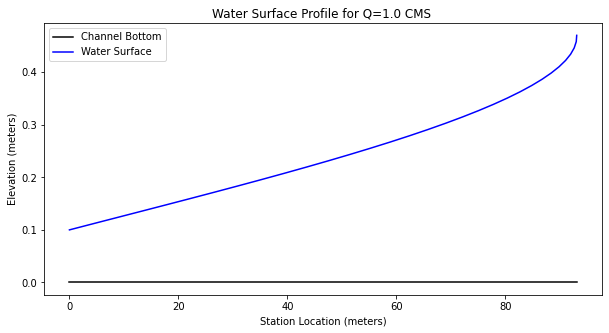

0 0.1
4.436732598938704 0.11193548387096774
8.890771308584114 0.12387096774193548
13.345925531714814 0.13580645161290322
17.78760249742602 0.147741935483871
22.202439396714528 0.1596774193548387
26.578020781699287 0.17161290322580647
30.902660708283786 0.1835483870967742
35.16523375300604 0.19548387096774195
39.35504304581471 0.20741935483870969
43.461716533328115 0.21935483870967742
47.475124951068075 0.23129032258064516
51.38531663212699 0.24322580645161293
55.182465480986565 0.25516129032258067
58.856829321149384 0.2670967741935484
62.39871647496652 0.27903225806451615
65.79845891811088 0.2909677419354839
69.04639071514907 0.3029032258064516
72.13283071890275 0.31483870967741934
75.04806872778249 0.3267741935483871
77.7823544585682 0.33870967741935487
80.32588881918448 0.35064516129032264
82.66881706565181 0.3625806451612903
84.80122350605285 0.37451612903225806
86.71312747685819 0.3864516129032258
88.39448036692608 0.3983870967741936
89.83516350466259 0.41032258064516136
91.0249867

In [6]:
# empty lists for variables
depth    = [0 for i in range(how_many)] #flow depth
bse      = [0 for i in range(how_many)] #channel bottom elevation
wse      = [0 for i in range(how_many)] #water surface elevation
deltax   = [0 for i in range(how_many)] #space steps
distance = [0 for i in range(how_many)] #station locations
velocity = [0 for i in range(how_many)] #section velocity

delta_depth = (begin_depth-end_depth)/(how_many-1)# change in depth for finding spatial steps

depth[0] = (begin_depth) # assign downstream value

for i in range(how_many):
    depth[i] = (depth[0]-i*delta_depth)# depth values to evaluate
    velocity[i] = (discharge/A_rect(width,depth[i])) #velocity for each depth
    
for i in range(how_many-1):
    depth_bar     = 0.5*(depth[i]+depth[i+1])    #compute average depth in reach
    area_bar      = A_rect(width,depth_bar)      #compute average area in reach
    perimeter_bar = P_rect(width,depth_bar)  #compute average wetted perimeter
    radius_bar    = Rh(area_bar,perimeter_bar)   #compute average hydraulic radius
    friction = slope_f(discharge,manningn,area_bar,radius_bar) #compute friction slope
    deltax[i] = ((depth[i+1]+(velocity[i+1]**2)/(2*9.8)) - (depth[i] + (velocity[i]**2)/(2*9.8)))/(slope-friction)

wse[0]=bse[0]+depth[0] # water surface at control point
for i in range(1,how_many):
    distance[i] = distance[i-1]+deltax[i-1]; # station distances
    bse[i] = bse[i-1]-deltax[i-1]*slope; # bottom elevations
    wse[i] = bse[i]+depth[i] # water surface elevations

import matplotlib.pyplot as plt # the python plotting library
plottitle ='Water Surface Profile for Q=' + str(round(discharge,1)) + ' CMS '
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(distance, bse, c='black') # basic line plot
plt.plot(distance, wse, c='blue') # basic line plot
plt.legend(['Channel Bottom','Water Surface'])
plt.xlabel('Station Location (meters)')
plt.ylabel('Elevation (meters)')
plt.title(plottitle)
plt.show()

for i in range(how_many):
    print(distance[i],depth[i])